# Parametric vs. NonParametric

In [99]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import math

Lets say we have a set of data from a sample

In [127]:
data = [-5,1,1.5,6.5,9,9.1,9.6,12,14.5]

Lets take two different models on this data - 1) MLE with Gaussian; 2) Kernel (Convolution w/ Gaussian) 

In [128]:
mle_model =  lambda x: sts.norm.pdf((x-np.mean(data))/np.std(data))
kde_model =  lambda x: np.mean([sts.norm.pdf((x - datum)) for datum in data])


Note that no matter how many points we have in our data set, the MLE model is defined by two parameters ($\mu$, $\sigma$). However, the KDE model on a data set of length n is defined by n parameters (the locations of each of the data points). Thus to encapsulate models on all possible data sets, we would theoretically need infinite parameters. Thus, the KDE model is a <b><em> nonparametric model </em> </b>

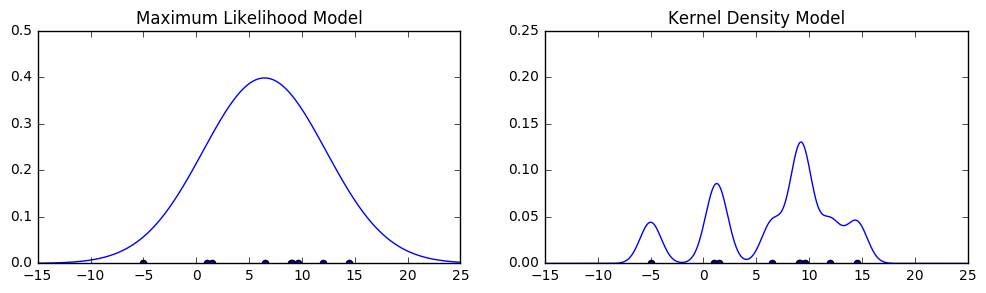

In [130]:
fig = plt.figure(figsize=(12,3))
models = [mle_model,kde_model]
names = ['Maximum Likelihood Model','Kernel Density Model']
for i in range(len(models)):
    ax = fig.add_subplot(121+i)
    ax.scatter(data,[0]*len(data))
    ax.set_title(names[i])
    ax.set_ylim(0,0.5/(i+1))
    ax.set_xlim(-15,25)
    ax.plot(np.arange(-15,25,0.01),[models[i](d) for d in np.arange(-15,25,0.01)])
plt.show()

## Bayesian Analysis

Let's say you get a freshly minted penny from the US Mint. You decide to test to see if it's fair, so you flip it 100 times, and run a simple test. You get heads 60 times. Now a standard statistical test would appear as follows: 

$$H_0: \text{ The coin is fair}\qquad X = 60$$
$$H_a: \text{The coin is unfair}\qquad X\neq 50$$
where X is the number of heads. The z statistic would be: 
$$z = \frac{X-X_0}{\sqrt{n*p*(1-p)}} = \frac{60-50}{\sqrt{100*0.5*0.5}} = 2.0$$
Then the p value is 
$$P(\lvert Z\rvert > z) = 0.045$$

According to our test, there is only a 4.5% chance that our result could have happened by chance, given that we had a fair coin. Traditional statistics suggest (with $\alpha = 0.05$) that we reject this hypothesis and conclude that there is significant evidence that the coin is biased. 


All done right? The problem is this conclusion leaves a sour taste in most of our mouths - this is in fact <b><em> not </em> </b> our irrationality coming to light - its the fact that this was a coin freshly made by the US Mint.... a coin this biased should be extremely unlikely. Moreover, let's say instead of testing whether the coin was fair, you wanted to chance a guess at the true weight of the coin - the probability p that it should result in a heads. 


By traditional standards, where you might fail to reject the null hypothesis for a various range of p values, the one with the highest p-value, i.e the one for which these results are <b><em> most likely </em></b> is p = 0.6. This is known as the <b><em> Maximum Likelihood Estimator</em></b>. This leaves an even sourer taste. Okay, you concede, perhaps the coin isn't perfectly fair. But it doesn't make sense that the US Mint would have produced SUCH a biased coin. Maybe the true value is p = 0.54 and then the result of 60 coins just happened by chance.... 

What you are subconsciously doing is the cornerstone of Bayesian statistics - utilizing the <b><em>prior distribution </em></b> or the prior. The evidence (60 heads) isn't as strong as the claim (The US treasury produced an extremely biased coin with p=0.6). Much criticism of Bayesian school of thought comes from this prior distribution. What shape is it? What are its parameters? How do you derive it. And its true, much of it is approximation and imprecision. Bayesians would argue that the counter (accepting the MLE) is foolish. 

Assume for now, that you think pretty much no coins produced by the US Treasury should have p >0.6 or p < 0.4. What you are doing here, is approximating the standard deviation of the prior distribution of coin weight. With a mean of 0.5, and a standard deviation of $\approx$ 0.03 roughly 2 for every 1000 coins will be extreme deviants (p > 0.6 or p < 0.4)

$$P(p = p) = \text{normpdf}\left(\frac{p-0.5}{0.03}\right) \sim N_p(0.5, 0.03^2)$$

In [103]:
probs = np.linspace (0,1,1000)
prior = [sts.norm.pdf((p-0.5)/.03) for p in probs]

Note that given just our prior, we would expect p = 0.5, which makes sense. Not having flipped the coin, it would make sense to assume its fair p = 0.5 having just come out of the treasury and all. Now we need to relate the prior to the <b><em> likelihood </em> </b>, i.e the probability of our data given a weight p

$$L(X = 60, n=100\lvert p = p) = {100\choose 60}(p)^{60}(1-p)^{40}$$

In [104]:
likelihood = like = [math.factorial(100)/(math.factorial(60)*math.factorial(40))*(p)**60*(1-p)**40 for p in probs]

Bayes theorem then tells us the probability of each value of p given our data: 
$$P (p=p\lvert X=60, n=100) = \frac{P(p=p)L(X=60,n=100\lvert p=p)}{P(X=60,n=100)}$$
Or as its usually stated: 
$$\boxed{Posterior = \frac{Prior\times Likelihood}{Evidence}}$$

Evidence is tedious to caculate it is the prior times the likelihood summed or integrated over all values of p, but fortunately it is the same here for all values of p (its only based on the evidence). So when comparing two different probabilities <u>given constant data </u> the only thing that matters is the numerator. Thus Bayes is also stated as: 

$$\boxed{Posterior = Prior \times Likelihood}$$

In [105]:
posterior = [p*l for p,l in zip(prior,likelihood)]
posterior = [1000*p/sum(posterior) for p in posterior]

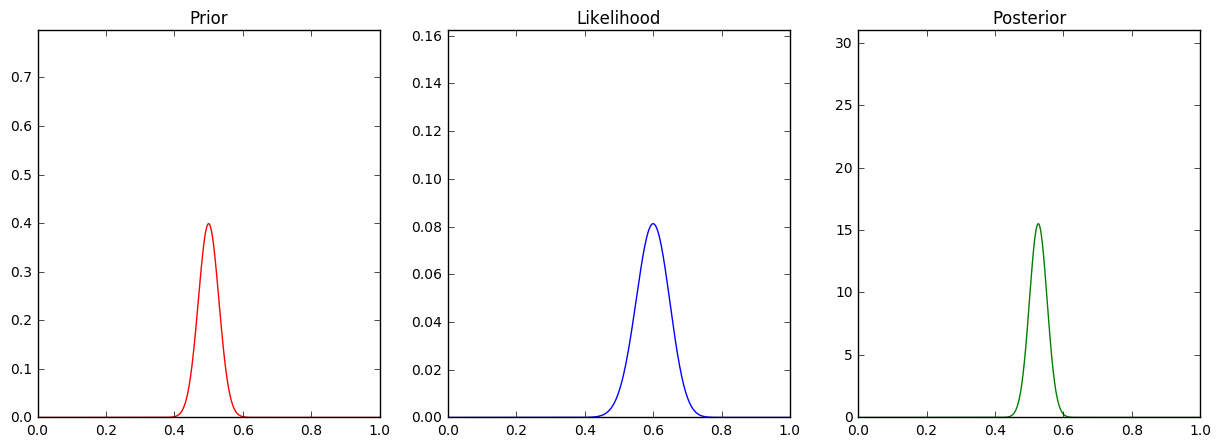

In [106]:
names = ['Prior', 'Likelihood', 'Posterior']
data =  [prior, likelihood,posterior]
colors = ['r','b','g']
fig = plt.figure(figsize=(15,5))
for i in range(len(data)): 
    ax = plt.subplot(131+i)
    ax.plot(probs,data[i],c=colors[i])
    ax.set_title(names[i])
    ax.set_xlim(0,1)
    ax.set_ylim(0,max(data[i])*2)
    
plt.show()

Scaled, plotting three on the same graph produces a better visual:

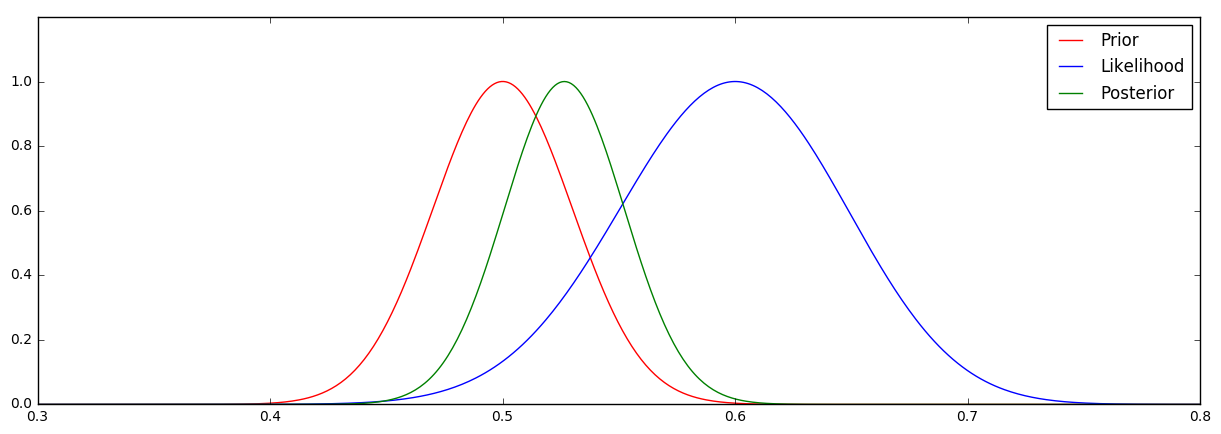

In [107]:
names = ['Prior', 'Likelihood', 'Posterior']
data =  [prior, likelihood,posterior]
colors = ['r','b','g']
fig = plt.figure(figsize=(15,5))
for i in range(len(data)): 
    plt.plot(probs,[a/max(data[i]) for a in data[i]],c=colors[i])
plt.xlim(0.3,0.8)
plt.ylim(0,1.2)
plt.legend(names)
plt.show()

This is consistent to the Bayesian concept of evidence. Before, seeing the data, your idea of <b>p</b> is the prior distribution(red). The likelihood distribution (blue), based on the evidence, updates your prior belief resulting in your new estimate (green). In this case, our new estimation of the most likely value of p is given (approximately) by: 

In [108]:
np.argmax(posterior)/1000

0.52600000000000002

1000

Or roughly $0.526$. This estimate perfectly combines our prior certainty (0.5) with our data. This number is slightly subjective, in the sense that in the absense of perfect knowledge of the stdev of the weight of freshly minted coins, our guess at standard deviation is just that. However, consider the alternative, the MLE. 

Given: 
Posterior = Prior x Likelihood
we now realized that taking the MLE as our most likely value for p, only is valid under the assumption that the prior is uniform - i.e that prior to the data, theres just enough evidence that p = 0.1 as there is for p=0.9 or any other value. While this may make sense in areas where we truly know nothing - it is evident that is an absurd prior to take/assume. 

#### Example
Now we will take a more general case and solve using mathematics instead of computation. Assume we have some parameter p, that we know a priori is distributed as a standard normal. Then we attempt to measure p by making an observation. The observation/sampling is unbiased; normally distributed around the true parameter p, with standard deviation 1. What is the distribution of the parameter p BASED on the data/measurement X? Remember that a normal pdf in a variable x with mean $\mu$ and variance $\sigma^2$ is given by: 
$$N_x(\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

In this case we have: $Posterior = Prior \times Likelihood / Evidence$ given by: 
$$P(p\lvert x) = \frac{N_p(0,1)N_x(p,1)}{\int_p N_p(0,1)N_x(p,1)} = \frac{\left(\frac{1}{\sqrt{2\pi}}e^{-p^2/2}\right)\left(\frac{1}{\sqrt{2\pi}}e^{-(x-p)^2/2}\right)}{\int_{-\infty}^{\infty}\left(\frac{1}{\sqrt{2\pi}}e^{-p^2/2}\right)\left(\frac{1}{\sqrt{2\pi}}e^{-(x-p)^2/2}\right)dp} = \frac{e^{xp-p^2}}{\int_{-\infty}^{\infty} e^{xp-p^2}dp}$$
Multiply top and bottom by $\frac{1}{\sqrt{\pi}}e^{-x^2/4}$ which (since we're integrating by p) is a constant and can go inside the integrand: 
$$P(P|X) = \frac{\frac{1}{\sqrt{\pi}}e^{-x^2/4+xp-p^2}}{\int_{-\infty}^{\infty}\frac{1}{\sqrt{\pi}}e^{-x^2/4+xp-p^2} dp} = \frac{\frac{1}{\sqrt{2\pi(1/2)}}e^{-(p-x/2)^2/(2*1/2)}}{\int_{-\infty}^{\infty}\frac{1}{\sqrt{2\pi(1/2)}}e^{-(p-x/2)^2/(2*1/2)}dp}$$
Note that the integrand (and the top) is simply a normal distribution with mean x/2 and variance 1/2. Since the integral over all values of any pdf must sum to one, the demoninator is one, and we have our answer: 
$$P(p\lvert x) = N_p\left(\frac{x}{2},\frac{1}{2}\right)$$

#### Example Notes:
There are a few things to note: 
<ol>
<li> The intution is dangerous to apply mathematically, but note how we can think of the posterior distribution as a weighted average of the prior and the likelihood distribution. Since the prior and likelihood have the same standard deviation in our example, it would stand to reason, that the weights would be 1/2. In fact, our posterior distribution in this case is the EXACT average of our prior $p = N(0,1)$ and our likelihood $x|p = N(p,1)$
<br><br>
<li> Note also how the posterior ended up having a normal distribution, just like the prior function. In such a case, the prior are posterior are called <b><em>conjugate distributions</em></b>, and the prior called a <b><em>conjugate prior</em></b> for the likelihood function.  i.e with our coin flipping example, if instead of the US Mint, we used some source where the prior was <em> beta distributed </em> then our posterior would also be <em> beta distributed </em>. Thus the beta distribution is the conjugate prior to the binomial distribution (our likelihood function for flipping a coin n times). 
<br><br>
<li> The normal distribution is its own conjugate prior, as shown in our example. This is analagous (but not exactly) to the concept of eigenfunctions -> The conjugate prior is analagous to an eigenvector of the likelihood operator. 
</ol>

## Monte Carlo Markov Chain (MCMC)

While we could easily create a posterior above in 1 dimension by calculating its value for every real number, this is not at all feasible as the number of dimensions increase. To get the same resolution for a posterior based on a vector of 4 values instead of 1, we would need to calculate a trillion values. As can be seen, there is a significant slowdown. However, if we want to sacrifice exactness, we can get an extremely good approximation by SIMULATING using the method of Mote Carlo Markov Chain

### Metropolis - Hastings Algorithm

Shown below is the <b> Metropolis-Hastings </b> algorithm, a method of sampling from a multivariate distribution

In [118]:
import random as rd

First we start the chain at some point. Then we choose a jumping distribution or proposal distribution. This is completely irrelevant to what our distribution of interest was, but is just a method of analyzing a wide range of values. Here we choose a normal distribution with mean of our past value and a standard deviation of 0.1 (constrained between 0 and 1 since we are sampling probabilities)

In [110]:
#First we start the chain at some point 
chain = [0.3]
## Remember we want to calculate the posterior distribution which is prior*likelihood.
prior = lambda p: sts.norm.pdf((p-0.5)/0.03)
likelihood = lambda p: math.factorial(100)/(math.factorial(60)*math.factorial(40)) *p**60*(1-p)**40
##Also necessary here is a proposal or "jumping" distribution that suggests a next value in the chain, here a normal distribution
jumping = lambda x: min(max(np.random.normal()*0.1+x,0),1)   
#Since we are dealing with probabilities, we cap the jump between 0 and 1


Then we randomly generate a proposal for the next element in the series from our jumping distribution. Whether this proposal becomes accepted is based on the acceptance value given by: 
$$r = \frac{f(x_p)J(x_p\lvert x_c)}{f(x_c)J(x_c\lvert x_p)}$$
where f is our distribution of interest, $x_p$ is the proposed point, $x_c$ the current point, and j our jumping distribution. 
Note that we chose a symmetric jumping distribution (the probability of generating $x_p$ from a normal distribution with mean $x_c$ is the same as the probability of generating $x_c$ from a normal distribution with mean $x_p$) this value for us simplifies to 
$$r = \frac{f(x_p)}{f(x_c)}$$
When a symmetric jumping distribution is used, the special case is just called the <b> Metropolis algorithm</b>. 
Now the key part, is that if r is higher, the next element in the chain is the proposed point (the chain jumps to that point). But if r is lower, we still want to generate a sample from there, with probability r.  The beauty of the Metropolis Hastings algorithm is that only the RATIO of our pdf of interest is necessary. That is to say, normalization constants are unimportant. 
<br><br>
This is incredible, because it saves us the necessity of calculating that tedious evidence term. So we can freely define f (our posterior) as simply prior times likelihood

In [ ]:
for _ in range(10000):
    proposal = jumping(chain[-1])
    #We calculate the ratio of the pdf we want to calculate (proposed)/(current)
    r = prior(proposal)*likelihood(proposal)/(prior(chain[-1])*likelihood(chain[-1]))
    #If the proposal is higher, we jump there always, but if its lower, we jump there sometimes proportional to how lower
    chain.append(proposal if rd.random()<r else chain[-1])

    

The process of generating this is a Markov Chain. Certain Markov chains have the property that as the number of iterations increase, the chain comes closer and closer to a <b>stationary state</b>, i.e the next step in the chain has the same distribution as the previous. This is actually what allows this to work! We can start the chain at any point - eventually, as the length gets bigger and bigger, our chain gets closer and closer to simply sampling our desired distribution!!

The downside of being able to start our chain anywhere, is that the a lot of the first terms of our chain are NOT yet close to the stationary state, and thus are NOT a good sample. Therefore it is customary to toss out a significant portion (~1/2) of the beginning of these Markov chains

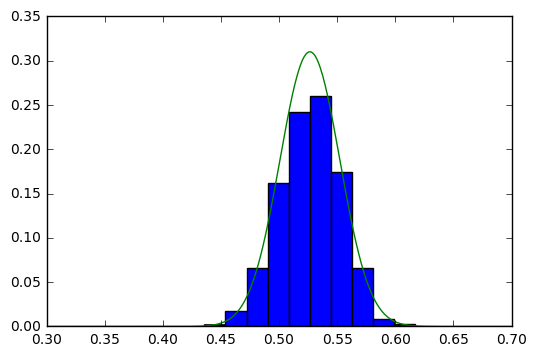

In [117]:
h = plt.hist(chain[5000:],weights = [1/len(chain[5000:]) for _ in chain[5000:]])
plt.plot(probs,np.array(posterior)/50,'-')
plt.xlim(0.3,0.7)
plt.show()

As seen above, our sample very closely approximates the actual distribution. The benefit of this is that we don't need to increase our chain length exponentially as the number of dimensions increase. As seen below, we have an extremely solid estimate for the true expected proportion of our penny from the previous example

In [14]:
np.average(chain[5000:])

0.52681536755630132

## Mixture Models

Now take an example of predicting apartment rent price given variables such as square feet, # of bedroom/baths, etc. Perhaps the single most important variable however is missing, the <em><u>neighborhood</u></em>. Within the same city, a 2BD 800 sqft apartment in an affluent neighborhood might go for $\$1200$ /month whereas one in a less affluent neighborhood might go for $\$900$/month.The neighborhood is a variable for which the distribution of the data itself might be different. This encapsulates the need for <b><em> mixture models</em></b>

Take for example a car that has different mpgs in city vs highway. Assume in this basic example that all trips are of the same length, etc. After each trip, we record the performance in miles per gallon (mpg). Assume mpgs are more or less normal with city mpg of 23 and highway mpg of 34 with standard deviations of 6 mpg for city and 3 mpg for highway

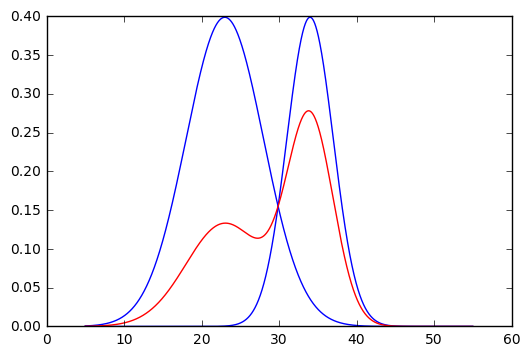

In [15]:
mpg = np.arange(5,55,0.01)
city_pdf = [sts.norm.pdf((m-23)/5) for m in mpg]
highway_pdf = [sts.norm.pdf((m-34)/3) for m in mpg]
mixture_model = [1/3*c + 2/3*h for c,h in zip(city_pdf,highway_pdf)]
plt.plot(mpg,city_pdf,c='b')
plt.plot(mpg,highway_pdf,c='b')
plt.plot(mpg,mixture_model,c='r')
plt.show()

We can of course extrapolate this to three dimensions.  Assume for three different cars (The Hyundai Elantra, Nissan Sentra, and Toyota Camry) we simultaneously measure city and highway mileage, which are iid normally distributed within each region. The Elantra has $\mu = (\mu_c,\mu_h) = (29,34)$, the Sentra $(23,31)$, the Camry $(25,39)$. Assume from all a stdev of 2.5 mpg city, 1 mpg highway. Given 430 thousand 2017 Camrys sold, 300 thousand Elantras, and 270 thousand Sentras, we can get the mixture model: 

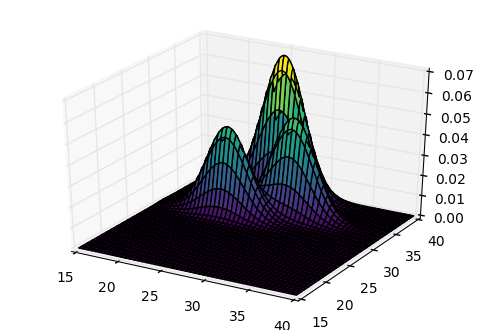

In [16]:
from mpl_toolkits import mplot3d
mu_elantra, mu_sentra, mu_camry = ((29,34), (23,31),(25,39))
sd = (2.5,1)

def pdf_2(x,y,mu,sd):
    return sts.norm.pdf((x-mu[0])/sd[0])*sts.norm.pdf((y-mu[1])/sd[1])
x = np.linspace(15,40,500)
y = np.linspace(15,40,500)
X,Y = np.meshgrid(x,y)
Z = .3*pdf_2(X,Y,mu_elantra,sd) + .27*pdf_2(X,Y,mu_sentra,sd)+.43*pdf_2(X,Y,mu_camry,sd)
ax = plt.axes(projection = '3d')
ax.plot_surface(X,Y,Z,cmap='viridis')
plt.show()

#### Sampling from Mixture (and other) multivariate models 
Shown above is the pdf of all 2017 Sentras, Elantras, and Camrys. But look what happens when we sample this 3d distribution (using as shown above, our MCMC method)

In [119]:
def f_mcmc(x,y): 
    sd = (2.5,1)
    return .3*pdf_2(x,y,mu_elantra,sd) + .27*pdf_2(x,y,mu_sentra,sd)+.43*pdf_2(x,y,mu_camry,sd)
proposal = lambda p:  [np.random.normal()*2 + c for c in p]
chain = [[30,30]]
for _ in range(10000): 
    pr = proposal(chain[-1])
    chain.append(pr if rd.random() < f_mcmc(*pr)/f_mcmc(*chain[-1]) else chain[-1])

        



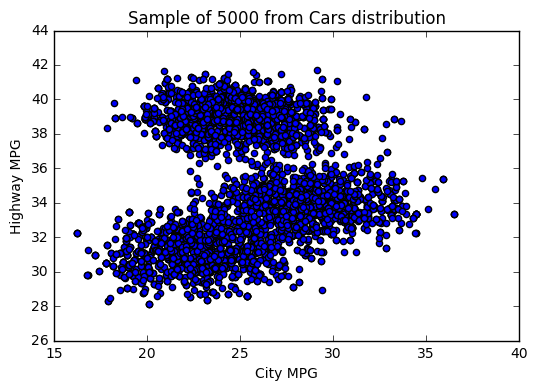

In [120]:
city_x,highway_y = zip(*chain[5000:])                         #Omit the first half of the MCMC chain for bias
plt.scatter(city_x,highway_y)
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.title('Sample of 5000 from Cars distribution')
plt.show()


This looks exactly like a clustering problem! In fact reversing this problem is in essense a clustering model - but with one added bonus. Let's say instead of sampling a mixture distribution to get data, we attempted to simply collect data and ended up with the data above. Now say, we used k-means clustering, the most common clustering algorithm 

In [121]:
from sklearn.cluster import KMeans

#### Interlude: k-means clustering

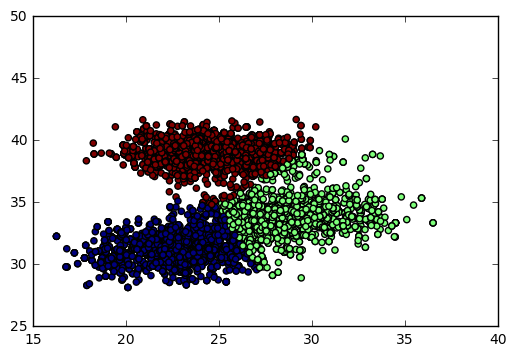

In [122]:
kmeans = KMeans(3, random_state=0)
labels = kmeans.fit(chain[5000:]).predict(chain[5000:])
plt.scatter(*zip(*chain[5000:]),c=labels)
plt.ylim(25,50)
plt.xlim(15,40)
plt.show()

As can be seen above, in a traditional k-means clustering, we specify the number of clusters (usually via cross-validation), and group the data into n clusters. There is of course a significant problem here as can be seen above. First of all, all we get is an assignment, we have no idea of the assurance of the measurement. Take the green/red border above. Clearly there must be heavy uncertainty on points along the border, but since k-means is due to (in this case) Euclidean DISTANCE from a center, the fact that the red/green border is less dense than the centers of the red and green clusters doesn't play into our estimate. In fact we have no way of ascertaining the probability that a point called red is actually red. Moreover, we can see points in the red/blue border than no sensible human would categorize as red but are still red. This is due to  kmeans default of using Euclidean distance as a metric for classification. But even customizing this metric (using Euclidean distance weighted in each direction in accordance with the variance in each direction, using PCA to collapse variation in each direction, etc. ) doesn't solve this problem. 

### Gaussian Mixture Models

Now let us invert what we already have. Instead of a known mixture of Gaussians based on each class, we have a mess of data and we need to classify it by modeling the data as the result of a Gaussian mixture and finding the most likely cluster based on this. Take the same data, and instead of using cross-validation use information criterion such as the <a href = 'https://onlinelibrary.wiley.com/doi/pdf/10.1002/wics.199'> Bayesian Information Criterion</a> and the <a href  =''>Akaike Information Criterion</a> for model selection. The difference between the AIC and BIC is not too important in this case, what is important is that both criterion decrease as more of the data is explained by the model. Thus the minimum of the information criterion points to the model you use. 

In [123]:
from sklearn.mixture import GMM

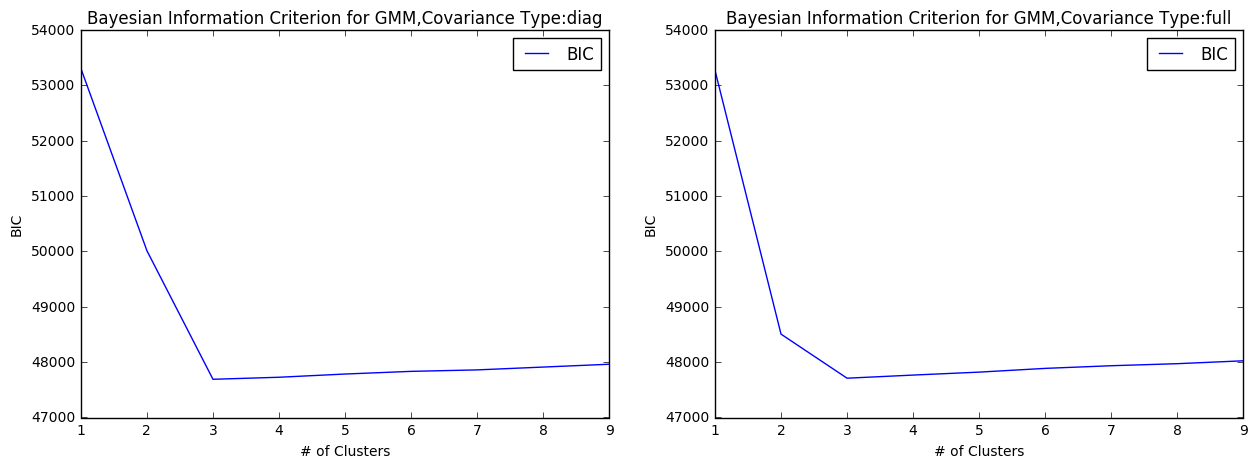

In [124]:
n = np.arange(1, 10)
cvar = ['diag','full']
models = [[GMM(c, covariance_type=cv, random_state=0).fit(chain[5000:]) for c in n]for cv in cvar]
fig = plt.figure(figsize = (15,5))
for i,mc in enumerate(models):
    ax = plt.subplot(121+i)
    ax.plot(n, [m.bic(np.array(chain[5000:])) for m in mc], label='BIC')
    ax.set_title('Bayesian Information Criterion for GMM,Covariance Type:{}'.format(cvar[i]))
    ax.set_xlabel('# of Clusters')
    ax.set_ylabel('BIC')
    ax.legend()
plt.show()

As can be seen above, BIC tells us that the best model is one with 3 gaussian centers (as expected). It is always best to plot the BIC graphically rather than writing code to find the minimum: If for example BIC(9) was smaller than BIC(3) by ~400 or so, BIC(3) would be the miles better model despite this. Note also the difference between the Diagonal and Full options for covariance type: 

A diagonal covariance type forces the covariance matrix to be diagonal / the factors are noncovariant, i.e the variance of City MPG does not depend on the value or variance of Highway MPG. In 2/3D the equivalent idea would be the data is clustered in ellipsoids whose axes are aligned with the axes. A spherical covariance type forces the covariance matrix to be diagonal as well as forcing the variance in each direction to be equal. This is analogous to classical k-means, with the idea being the data is clustered in N-dimensional spheres. The full covariance type has no restriction on the covariance matrix - an ellipsoid with axes pointing in any direction 

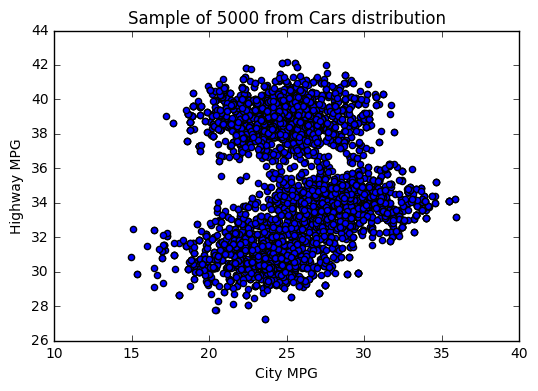

In [29]:
city_x,highway_y = zip(*chain[5000:])                         #Omit the first half of the MCMC chain for bias
plt.scatter(city_x,highway_y)
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.title('Sample of 5000 from Cars distribution')
plt.show()


The data reproduced above confirms what the BIC graphs say. If the covariance is full, the big grouping of points on the lower half of the graph could be conceivably one giant ellipse oriented along a diagonal axis. Thus while there is statistically significant gain to selecting 3 clusters over two, its not much (BIC (3) - BIC (2) ) is small. However, if we assume the covariance to be diagonal, it is evident that three clusters might be needed, thus there is a huge gain in information from selecting three clusters instead of four. If we can assume that the various factors are independent, this is a reasonable assumption. We'll cheat a little in this case, since we know the data was generated with independent City and Highway distributions but usually, this is an important consideration

In [32]:
gmm = GMM(3,covariance_type='diag',random_state=0).fit(chain[5000:])
print('The data shows three clusters with centers as below:')
for i in range(len(gmm.means_)):
    print('Cluster {}: City MPG: {}, Highway MPG: {}'.format(i+1, '%.1f'%(gmm.means_[i][0]), '%.1f'%(gmm.means_[i][1])))
    print('Cluster {} Stdev- City: {}, Highway: {}'.format(i+1,'%.1f'%(np.sqrt(gmm.covars_[i][0])), '%.1f'%(np.sqrt(gmm.covars_[i][1]))))

The data shows three clusters with centers as below:
Cluster 1: City MPG: 23.2, Highway MPG: 31.0
Cluster 1 Stdev- City: 2.5, Highway: 1.0
Cluster 2: City MPG: 28.8, Highway MPG: 34.0
Cluster 2 Stdev- City: 2.6, Highway: 1.0
Cluster 3: City MPG: 24.6, Highway MPG: 39.0
Cluster 3 Stdev- City: 2.5, Highway: 1.0


Note that our results are extremely close to the true generator of the data. But more importantly, we can modify the plot to show the sureness of each point

In [33]:
probs = gmm.predict_proba(np.array(chain[5000:]))  

In [34]:
gmm.predict_proba([[24,34]])

array([[  7.43466886e-02,   9.25613346e-01,   3.99653041e-05]])

In [35]:
def d2hx(i):
    if i<0 or i>255:
        return '00'
    else:
        trans = {10:'a',11:'b',12:'c',13:'d',14:'e',15:'f'}
        spl = [i//16, i%16]
        return ''.join([trans[a] if a>=10 else str(a) for a in spl])

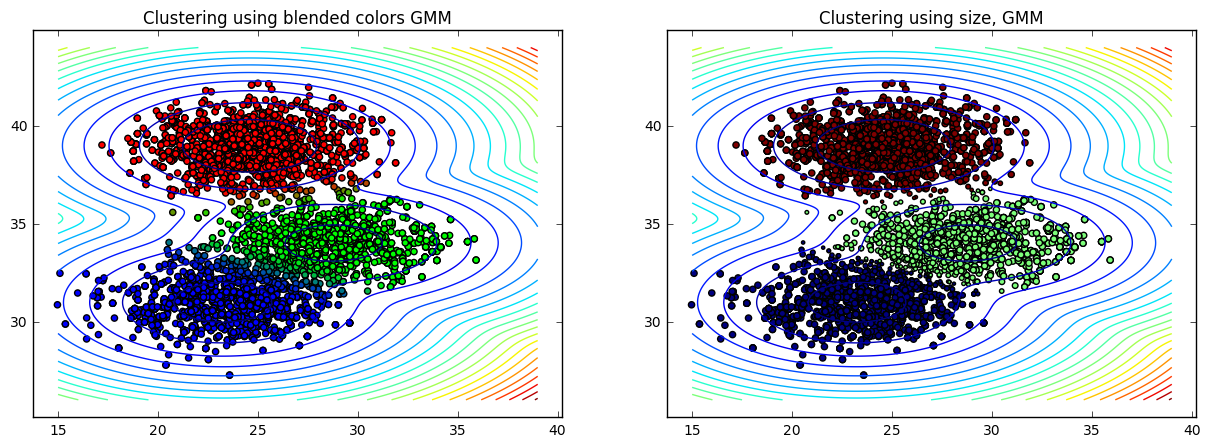

In [65]:
x = np.linspace(15,39,1000)
y = np.linspace(26,44,1000)
X,Y = np.meshgrid(x,y)
Z = -gmm.score(np.transpose([np.tile(x,len(y)),np.repeat(y,len(x))]))


probs = gmm.predict_proba(np.array(chain[5000:]))   # For each point probabilities it exists in each of the three clusters
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(121)
ax.scatter(*zip(*chain[5000:]),c = ['#'+''.join([d2hx(int(256*a-1)) for a in pr[::-1]]) for pr in probs])
ax.contour(X,Y,Z.reshape((len(X),len(Y))),25)
ax.set_title('Clustering using blended colors GMM')
ax = fig.add_subplot(122)
labels = gmm.predict(chain[5000:])
ax.scatter(*zip(*chain[5000:]),c = labels, s = 20*probs.max(1)**2)
ax.contour(X,Y,Z.reshape((len(X),len(Y))),25)
ax.set_title('Clustering using size, GMM')
plt.show()

## Dirichlet Clustering

In [37]:
gmm.weights_

array([ 0.29248205,  0.2770904 ,  0.43042755])

Now take the your Gaussian mixture model. Assume, as in our example above, that we know the variance of each distribution (fixed at 6.25 mpg^2 city and 1 mpg^2 highway). How do we assume (for our prior) that the weights are <b> distributed </b>? We know that they are centered around the resepctive mpg of our three cars, we know that what the weights ARE. but how are they distributed? 

(What we are trying to do here is hunting for a prior for our weights instead of just finding the MLE to properly do Bayesian inference)

Well, we know the weights cannot be IID, since these are probability weights, they must add up to 1. What we have is a distribution of k weights on a probability simplex $\Delta_k$, i.e the set of all arrays with length k of positive numbers that add up to one. However, if k is finite, a simple method might be to sample k variables on $\lbrack 0, \infty \rbrace$ with some distribution H and divide by their sum. If H is <em>gamma distributed </em>, we get the mathematically simplest distribution on $\Delta _k$: The Dirichlet distribution


In [67]:
from scipy.special import gamma
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=True)

def dirichlet(simplex, alpha):
    return np.array([0 if point[-1]<=0 else gamma(sum(alpha))*np.product(point**(alpha-1)/gamma(alpha))for point in simplex])
import warnings
warnings.filterwarnings('ignore')

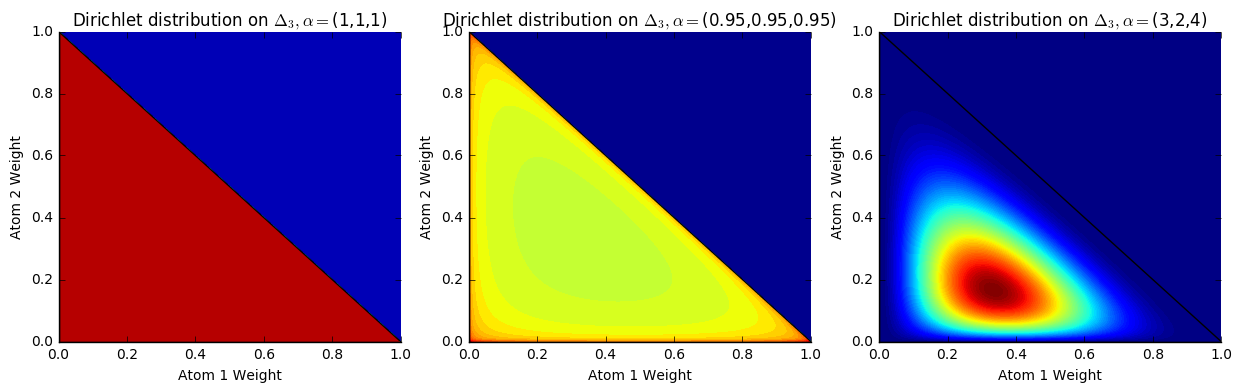

In [93]:

x = np.linspace(0,1,100)
y = 1-x
x2 = np.linspace(0.001,1,200)
y2 = np.linspace(0.001,1,200)
X,Y = np.meshgrid(x2,y2)
SIMPLEX = [np.append(r,1-sum(r)) for r in np.transpose([np.tile(x2,len(y2)),np.repeat(y2,len(x2))] )]
fig = plt.figure(figsize=(15,4))
plt.rc('text', usetex=False)
for i, alpha in enumerate([np.array([1,1,1]),np.array([0.95,.95,0.95]),np.array([3,2,4])]):
    
    ax = plt.subplot(131 + i)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title('Dirichlet distribution on '+r'$\Delta_3, \alpha=$'+'({},{},{})'.format(*alpha))
    ax.set_ylabel('Atom 2 Weight')
    ax.set_xlabel('Atom 1 Weight')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.plot(x,y,'k')
    ax.contourf(X,Y,dirichlet(SIMPLEX,alpha).reshape((len(x2),len(y2))),10*(i+1)**2)
plt.show()



Note that $\alpha = (1,1,\cdots)$ is the uniform distribution on $\Delta_k$